In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
class Single_Neuron:
    def __init__(self, n_KC, init_weight = 0.5, weight_sd = 0.0):
        self.n = n_KC
        self.weights = init_weight+weight_sd*np.random.normal(size=n_KC)
        self.cum_weight = [self.weights]
        
    def compute(self,odor,linear=True):
        return np.dot(odor,self.weights)#/self.n
        
    def train_reward(self,odor,alpha):
        w = self.weights
#         self.weights =w + alpha*odor*w*(1-w)
        self.weights =np.clip( w + alpha*odor,0,1)
        self.cum_weight.append(self.weights)

In [3]:

def gen_odor(f_KC=f_KC,n_KC=n_KC):
    return np.random.choice([0,1],size=n_KC,p=[1-f_KC,f_KC])

def gen_odor_2(f_KC=f_KC,n_KC=n_KC):
    arr = np.array([1]*int(f_KC*n_KC)+[0]*int((1-f_KC)*n_KC))
    np.random.shuffle(arr)
    return arr

In [21]:
for f_KC in [0.2,0.05]:
    n_KC = 100
    for alpha in [0.5,-0.1]:
        for n_CS in [1,5,10,20]:
            
            sc_set = []
            n_odors = 1000
            n_rep = 1

            for r in range(n_rep):
                odors = []
                for i in range(n_odors):
                    odors.append(gen_odor())
                odors= np.array(odors)

                CS = []
                for i in range(n_CS):
                    CS.append(gen_odor_2())
                CS= np.array(CS)

                N = Single_Neuron(n_KC=n_KC,init_weight=0.5,weight_sd=0.00)

                sc = []

                for j in range(10):
                    
                    for i in range(n_CS):
                        N.train_reward(CS[i],alpha=alpha)

                    dist_odor = np.histogram(N.compute(odors),bins=range(int(f_KC*n_KC)+1),normed=True)[0]
                    print(dist_odor)
                    discrimination_score = (np.histogram(N.compute(CS),bins=range(int(f_KC*n_KC)+1))[0]*dist_odor).sum()
                    sc.append(discrimination_score)
                
                sc_set.append(sc)

            df = pd.DataFrame(np.array(sc_set).T,columns=['replicate_'+str(n) for n in range(n_rep)])
            print('{}_KC_{}_f_{}_odor_{}_CS_{}_lr.csv'.format(n_KC,f_KC,n_odors,n_CS,alpha))
            print(df.head())
            df.to_csv('{}_KC_{}_f_{}_odor_{}_CS_{}_lr.csv'.format(n_KC,f_KC,n_odors,n_CS,alpha))

[0.         0.         0.         0.         0.00100402 0.00502008
 0.01104418 0.02911647 0.04417671 0.08333333 0.12650602 0.17570281
 0.13654618 0.14959839 0.10240964 0.06124498 0.03614458 0.0251004
 0.00803213 0.00502008]
[0.         0.         0.         0.         0.00100402 0.00502008
 0.01104418 0.02911647 0.04417671 0.08333333 0.12650602 0.17570281
 0.13654618 0.14959839 0.10240964 0.06124498 0.03614458 0.0251004
 0.00803213 0.00502008]
[0.         0.         0.         0.         0.00100402 0.00502008
 0.01104418 0.02911647 0.04417671 0.08333333 0.12650602 0.17570281
 0.13654618 0.14959839 0.10240964 0.06124498 0.03614458 0.0251004
 0.00803213 0.00502008]
[0.         0.         0.         0.         0.00100402 0.00502008
 0.01104418 0.02911647 0.04417671 0.08333333 0.12650602 0.17570281
 0.13654618 0.14959839 0.10240964 0.06124498 0.03614458 0.0251004
 0.00803213 0.00502008]
[0.         0.         0.         0.         0.00100402 0.00502008
 0.01104418 0.02911647 0.04417671 0.0

[0.    0.    0.008 0.036 0.155 0.288 0.291 0.157 0.049 0.013 0.003 0.
 0.    0.    0.    0.    0.    0.    0.    0.   ]
[0.001 0.069 0.331 0.425 0.15  0.021 0.003 0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.   ]
[0.067 0.454 0.394 0.078 0.007 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.   ]
[0.243 0.589 0.158 0.01  0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.   ]
[0.491 0.441 0.066 0.002 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.   ]
[0.491 0.441 0.066 0.002 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.   ]
[0.491 0.441 0.066 0.002 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.   ]
[0.491 0.441 0.066 0.002 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.   ]
[0.491 0.441 0.066 0.002 0.    0.    0. 

/groups/turner/home/mohantas/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:842: RuntimeWarning: invalid value encountered in true_divide
  return n/(n*db).sum(), bin_edges


[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
100_KC_0.05_f_1000_odor_10_CS_0.5_lr.csv
   replicate_0
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
100_KC_0.05_f_1000_odor_20_CS_0.5_lr.csv
   replicate_0
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
[0. 0. 0. 0. 1.]
[0.  0.  0.  0.2 0.8]
[0.         0.         0.         0.23076923 0.76923077]
[0.   0.   0.04 0.08 0.88]
[0.         0.         0.01886792 0.05660377 0.9245283 ]
[0.         0.         0.01886792 0.05660377 0.9245283 ]
[0.         0.         0.01886792 0.05660377 0.9245283 ]
[0. 

In [1]:
for f_KC in [0.05]:
    n_KC = 100
    for alpha in [0.5]:
        for n_CS in [5]:
            
            sc_set = []
            n_odors = 1000
            n_rep = 2

            for r in range(n_rep):
                odors = []
                for i in range(n_odors):
                    odors.append(gen_odor())
                odors= np.array(odors)

                CS = []
                for i in range(n_CS):
                    CS.append(gen_odor_2())
                CS= np.array(CS)

                N = Single_Neuron(n_KC=n_KC,init_weight=0.5,weight_sd=0.00)

                sc = []

                for j in range(1):
                    
                    for i in range(n_CS):
                        N.train_reward(CS[i],alpha=alpha)

                    dist_odor = np.histogram(N.compute(odors),bins=range(int(f_KC*n_KC)+1),normed=True)[0]
                    print(dist_odor)
                    discrimination_score = (np.histogram(N.compute(CS),bins=range(int(f_KC*n_KC)+1))[0]*dist_odor).sum()
                    print(discrimination_score)
                    sc.append(discrimination_score)
                
                sc_set.append(sc)

            df = pd.DataFrame(np.array(sc_set).T,columns=['replicate_'+str(n) for n in range(n_rep)])
            df.to_csv('{}_KC_{}_f_{}_odor_{}_CS_{}_lr.csv'.format(n_KC,f_KC,n_odors,n_CS,alpha))

NameError: name 'gen_odor' is not defined

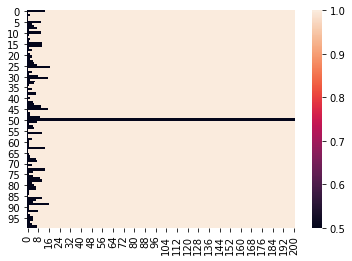

In [5]:
sns.heatmap(np.array(N.cum_weight).T)
plt.show()

In [118]:
dist_odor = np.histogram(N.compute(odors),bins=range(int(f_KC*n_KC)+1),normed=True)[0]
print(dist_odor)
discrimination_score = np.histogram(N.compute(CS),bins=range(int(f_KC*n_KC)+1),normed=True)[0]
discrimination_score

[0.336 0.511 0.145 0.008 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.   ]


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

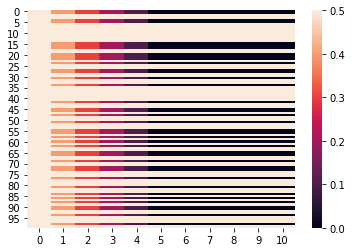

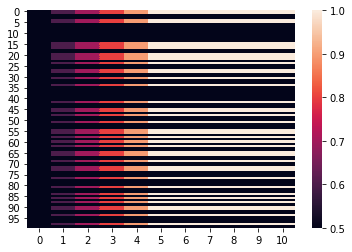

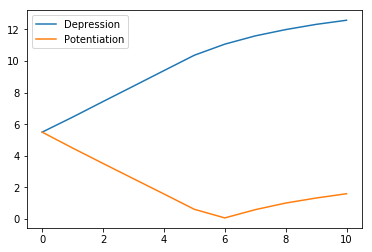

In [241]:
SN_D = Single_Neuron(n_KC=n_KC,init_weight=0.5,weight_sd=0.0)
SN_P = Single_Neuron(n_KC=n_KC,init_weight=0.5,weight_sd=0.0)

A = gen_odor()

ts_score_D= []
ts_score_P= []

score_D = []
score_P = []

for i in range(5000):
    B = gen_odor()
    score_D.append((SN_D.compute(A)-SN_D.compute(B)))
    score_P.append((SN_P.compute(A)-SN_P.compute(B)))
ts_score_D.append(abs(np.mean(score_D)))
ts_score_P.append(abs(np.mean(score_P)))

for ts in range(10):
    SN_D.train_reward(A,alpha=-0.1)
    SN_P.train_reward(A,alpha=0.1)
    
    for i in range(5000):
        B = gen_odor()
        score_D.append((SN_D.compute(A)-SN_D.compute(B)))
        score_P.append((SN_P.compute(A)-SN_P.compute(B)))
    ts_score_D.append(abs(np.mean(score_D)))
    ts_score_P.append(abs(np.mean(score_P)))

sns.heatmap(np.array(SN_D.cum_weight).T)
plt.show()
sns.heatmap(np.array(SN_P.cum_weight).T)
plt.show()
    
plt.plot(ts_score_D,label='Depression')
plt.plot(ts_score_P,label='Potentiation')
plt.legend()

8.0
16.0


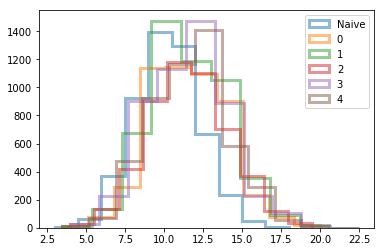

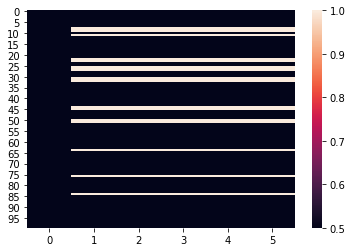

In [248]:
SN = Single_Neuron(n_KC=n_KC,init_weight=0.5,weight_sd=0.0)

A = gen_odor()

score = []

for i in range(5000):
    B = gen_odor()
    score.append(SN.compute(B))
plt.hist(score,alpha=0.5,label='Naive',histtype='step',linewidth=3)
print(SN.compute(A))

for ts in range(5):
    SN.train_reward(A,alpha=+0.5)
    score = []
    for i in range(5000):
        B = gen_odor()
        score.append(SN.compute(B))
#     plt.m
    plt.hist(score,alpha=0.5,label=str(ts),histtype='step',linewidth=3)

print(SN.compute(A))
# sns.heatmap(np.array(SN_P.cum_weight).T)
# plt.show()
plt.legend()
plt.show()

sns.heatmap(np.array(SN.cum_weight).T)
plt.show()

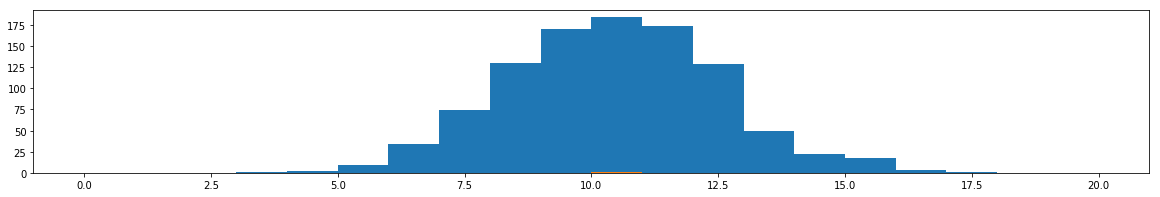

ODOR Presentation Set Number 1: Discrimination Score 0.141


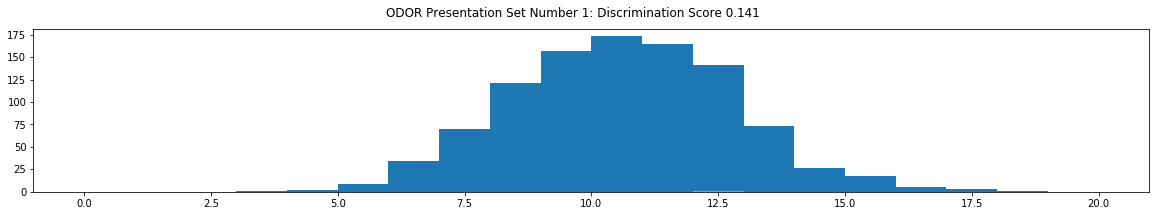

ODOR Presentation Set Number 2: Discrimination Score 0.099


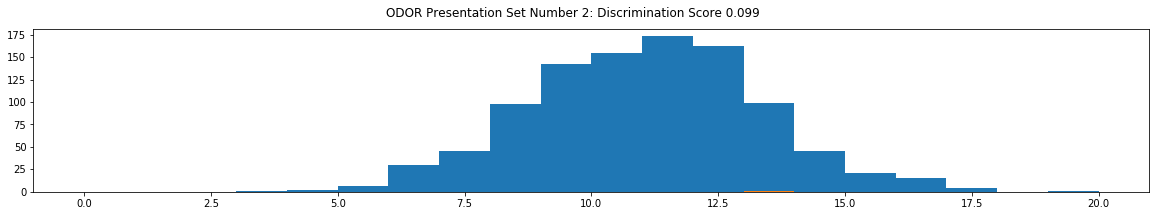

ODOR Presentation Set Number 3: Discrimination Score 0.015


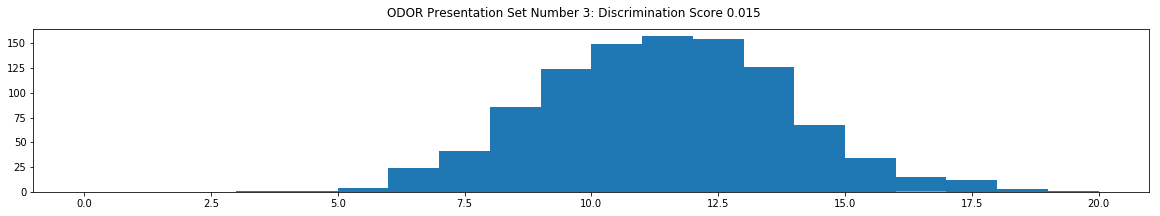

ODOR Presentation Set Number 4: Discrimination Score 0.006


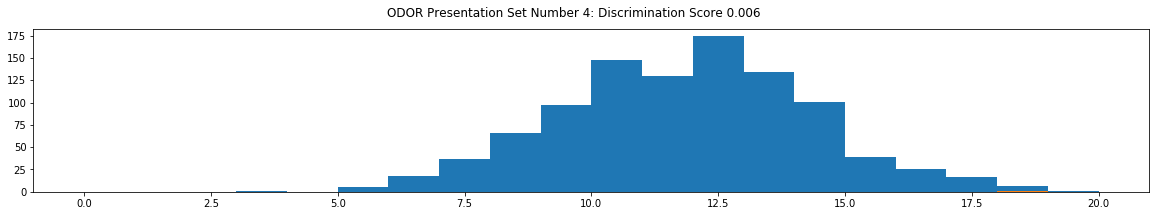

ODOR Presentation Set Number 5: Discrimination Score 0.007


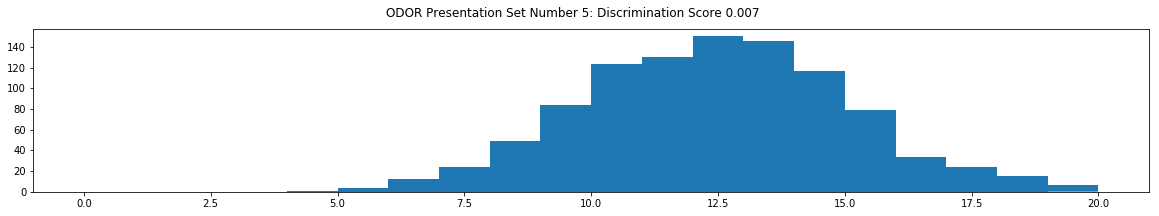

ODOR Presentation Set Number 6: Discrimination Score 0.007


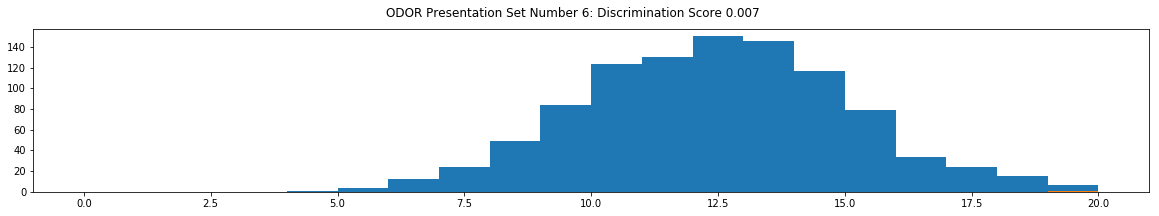

ODOR Presentation Set Number 7: Discrimination Score 0.007


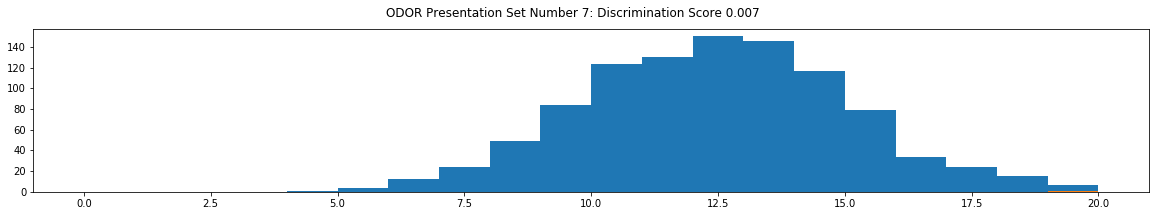

ODOR Presentation Set Number 8: Discrimination Score 0.007


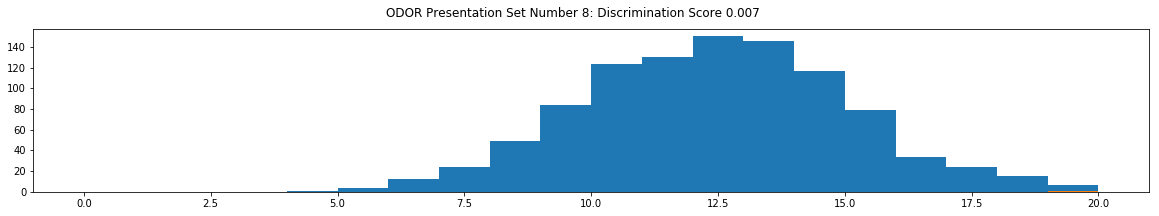

ODOR Presentation Set Number 9: Discrimination Score 0.007


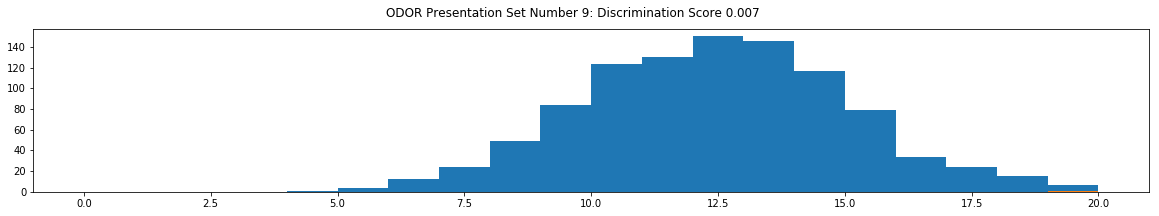

ODOR Presentation Set Number 10: Discrimination Score 0.007


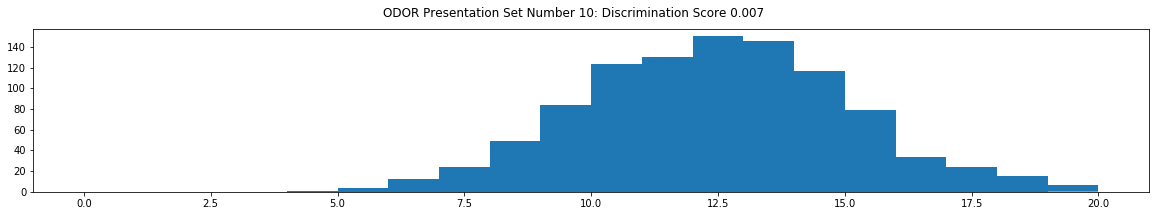

In [10]:
n_KC = 100
f_KC = 0.2

sc_set = []
n_odors = 1000
n_CS = 1
n_rep = 1
alpha = +0.1

for r in range(n_rep):
    odors = []
    for i in range(n_odors):
        odors.append(gen_odor())
    odors= np.array(odors)
    
    CS = []
    for i in range(n_CS):
        CS.append(gen_odor_2())
    CS= np.array(CS)

    N = Single_Neuron(n_KC=n_KC,init_weight=0.5,weight_sd=0.00)

    plt.figure(figsize=(20,3))
    plt.subplot(1,1,1)
    plt.hist(N.compute(odors),bins=range(int(f_KC*n_KC)+1))
    plt.hist(N.compute(CS),bins=range(int(f_KC*n_KC)+1))
    plt.show()

    sc = []

    for j in range(10):
        plt.figure(figsize=(20,3))
        for i in range(n_CS):
            N.train_reward(CS[i],alpha=alpha)
            plt.subplot(1,n_CS,i+1)
            plt.hist(N.compute(odors),bins=range(int(f_KC*n_KC)+1))
            plt.hist(N.compute(CS),bins=range(int(f_KC*n_KC)+1))

        dist_odor = np.histogram(N.compute(odors),bins=range(int(f_KC*n_KC)+1),normed=True)[0]
        discrimination_score = (np.histogram(N.compute(CS),bins=range(int(f_KC*n_KC)+1))[0]*dist_odor).sum()
        sc.append(discrimination_score)
        plt.suptitle("ODOR Presentation Set Number {}: Discrimination Score {:0.3f}".format(j+1,discrimination_score))
        print("ODOR Presentation Set Number {}: Discrimination Score {:0.3f}".format(j+1,discrimination_score))
        plt.show()
    sc_set.append(sc)
    
df = pd.DataFrame(np.array(sc_set).T,columns=['replicate_'+str(n) for n in range(n_rep)])
df.to_csv('{}_KC_{}_f_{}_odor_{}_CS_{}_lr.csv'.format(n_KC,f_KC,n_odors,n_CS,alpha))

In [247]:
comb(100,20)

5.359833704038096e+20

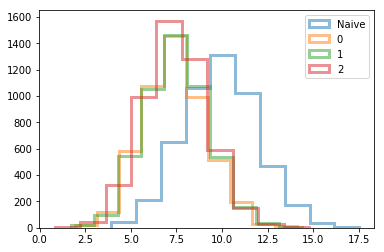

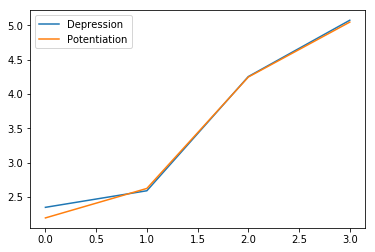

In [222]:
SN_D = Single_Neuron(n_KC=n_KC,init_weight=0.5,weight_sd=0.05)
SN_P = Single_Neuron(n_KC=n_KC,init_weight=0.5,weight_sd=0.05)

A = gen_odor()

ts_score_D= []
ts_score_P= []

score_D = []
score_P = []

temp = []

for i in range(5000):
    B = gen_odor()
    score_D.append((SN_D.compute(A)-SN_D.compute(B)))
    score_P.append((SN_P.compute(A)-SN_P.compute(B)))
    temp.append(SN_P.compute(B))
    
plt.hist(temp,alpha=0.5,label='Naive',histtype='step',linewidth=3)
ts_score_D.append(abs(np.mean(score_D)))
ts_score_P.append(abs(np.mean(score_P)))

for ts in range(3):
    SN_D.train_reward(A,alpha=-(1-f_KC))
    SN_P.train_reward(A,alpha=-(1-f_KC))
    
    temp = []
    
    for i in range(5000):
        B = gen_odor()
        score_D.append((SN_D.compute(A)-SN_D.compute(B)))
        score_P.append((SN_P.compute(A)-SN_P.compute(B)))
        temp.append(SN_P.compute(B))
    
    plt.hist(temp,alpha=0.5,histtype='step',linewidth=3,label=str(ts))
    ts_score_D.append(abs(np.mean(score_D)))
    ts_score_P.append(abs(np.mean(score_P)))
    
plt.legend()
plt.show()

# sns.heatmap(np.array(SN_D.cum_weight).T)
# plt.show()
# sns.heatmap(np.array(SN_P.cum_weight).T)
# plt.show()

plt.plot(ts_score_D,label='Depression')
plt.plot(ts_score_P,label='Potentiation')
plt.legend()

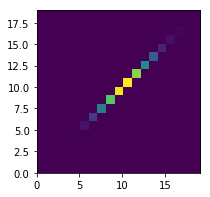

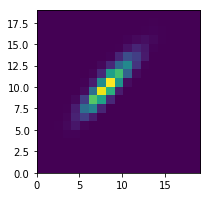

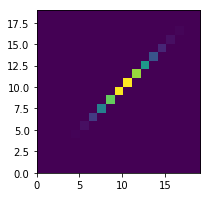

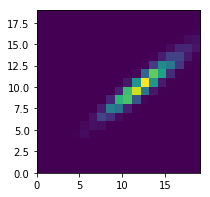

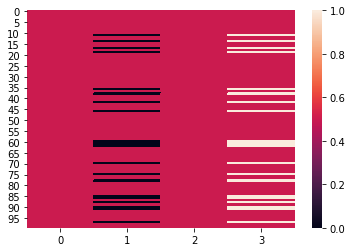

In [260]:
N1 = Single_Neuron(n_KC=n_KC,init_weight=0.5,weight_sd=0.0)
N2 = Single_Neuron(n_KC=n_KC,init_weight=0.5,weight_sd=0.0)

A = gen_odor()

xedges = list(range(20))
yedges = list(range(20))

score_1 = []
score_2 = []

for i in range(5000):
    B = gen_odor()
    score_1.append(N1.compute(B))
    score_2.append(N2.compute(B))

H, xedges, yedges = np.histogram2d(score_1, score_2, bins=(xedges, yedges))
H = H.T 
fig = plt.figure(figsize=(7, 3))
plt.imshow(H, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.show()

N1.train_reward(A,alpha=-0.5)
score_1 = []
score_2 = []

for i in range(5000):
    B = gen_odor()
    score_1.append(N1.compute(B))
    score_2.append(N2.compute(B))

H, xedges, yedges = np.histogram2d(score_1, score_2, bins=(xedges, yedges))
H = H.T 
fig = plt.figure(figsize=(7, 3))
plt.imshow(H, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.show()

N1.train_reward(A,alpha=+0.5)
score_1 = []
score_2 = []

for i in range(5000):
    B = gen_odor()
    score_1.append(N1.compute(B))
    score_2.append(N2.compute(B))

H, xedges, yedges = np.histogram2d(score_1, score_2, bins=(xedges, yedges))
H = H.T 
fig = plt.figure(figsize=(7, 3))
plt.imshow(H, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.show()

N1.train_reward(A,alpha=+0.5)
score_1 = []
score_2 = []

for i in range(5000):
    B = gen_odor()
    score_1.append(N1.compute(B))
    score_2.append(N2.compute(B))

H, xedges, yedges = np.histogram2d(score_1, score_2, bins=(xedges, yedges))
H = H.T 
fig = plt.figure(figsize=(7, 3))
plt.imshow(H, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.show()
# plt.hist(score_1,alpha=0.5,label='Naive',histtype='step',linewidth=3)

# for ts in range(5):
#     SN.train_reward(A,alpha=+0.5)
#     score = []
#     for i in range(5000):
#         B = gen_odor()
#         score.append(SN.compute(B))
# #     plt.m
#     plt.hist(score,alpha=0.5,label=str(ts),histtype='step',linewidth=3)

# print(SN.compute(A))
# # sns.heatmap(np.array(SN_P.cum_weight).T)
# # plt.show()
# plt.legend()
# plt.show()

sns.heatmap(np.array(N1.cum_weight).T)
plt.show()